In [124]:
import numpy as np
import matplotlib.pyplot as plt
#This class has some cool sample data
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [125]:
n_pts = 500
#Creating CLusters... with 5 different classes on our case
centers = [[-1,1],[-1,-1],[1,-1], [1,1], [0,0]]
X,y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=.4 )

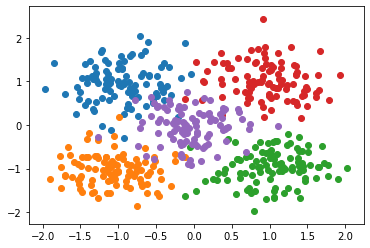

In [126]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])

In [127]:
#We do have 3 classes, so we give the labels and the categories we want
#With this we create the hot encoding process
y_cat = to_categorical(y, 5)

In [128]:
model = Sequential()
#Using Softmax, we have 5 classes(3) as Output, but we need only 2 inputs(x and y)
model.add(Dense(units=5, input_shape=(2,), activation='softmax'))
#Compiling the Model with 0.01 Learnign rate with Category Cross Entropy
model.compile(Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [129]:
h = model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=100, shuffle='true')

Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: 1.4339 - accuracy: 0.2920
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.8300
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.4566 - accuracy: 0.8980
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.3559 - accuracy: 0.9280
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.3085 - accuracy: 0.9380
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2807 - accuracy: 0.9360
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2597 - accuracy: 0.9460
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2453 - accuracy: 0.9400
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2334 - accuracy: 0.9400
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2242 - accuracy: 0.9460
Epoch 11/

In [130]:
def plot_decision_boundary(X, y_cat, model):
    #+1 to have it more nicely on the chart... and we want to have a 50x50 grid 
    x_span = np.linspace(min(X[:,0]) -0.25, max(X[:,0]) + 0.25, 50)
    y_span = np.linspace(min(X[:,1]) -0.25 , max(X[:,1]) + 0.25, 50)
    xx,yy = np.meshgrid(x_span, y_span)
    xx_,yy_ = xx.ravel(),yy.ravel()
    grid = np.c_[xx_,yy_]
    ##running prediction!
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)    
    plt.contourf(xx,yy,z)

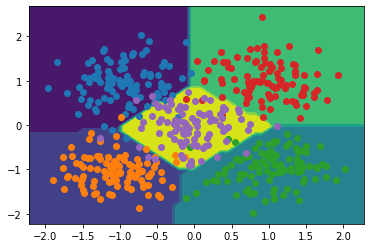

In [131]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])

Prediction is [2]


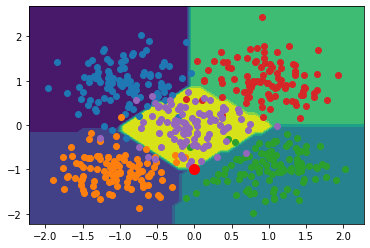

In [132]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])
##Here we make a simulation for the point bellow!
x_test=0
y_test=-1
point = np.array([[x_test,y_test]])
prediction = model.predict_classes(point)
plt.plot([x_test],[y_test], marker='o', markersize=10, color='red')
print('Prediction is', prediction)